In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load the data
df = pd.read_csv('NYC_taxi_trip_train.csv',
    parse_dates=['pickup_datetime', 'dropoff_datetime']
)



In [16]:
# 2. Feature engineering
df['pickup_hour']     = df['pickup_datetime'].dt.hour
df['pickup_week']     = df['pickup_datetime'].dt.isocalendar().week
df['pickup_dow']      = df['pickup_datetime'].dt.dayofweek  # 0=Mon,6=Sun
df['trip_duration_m'] = df['trip_duration'] / 60



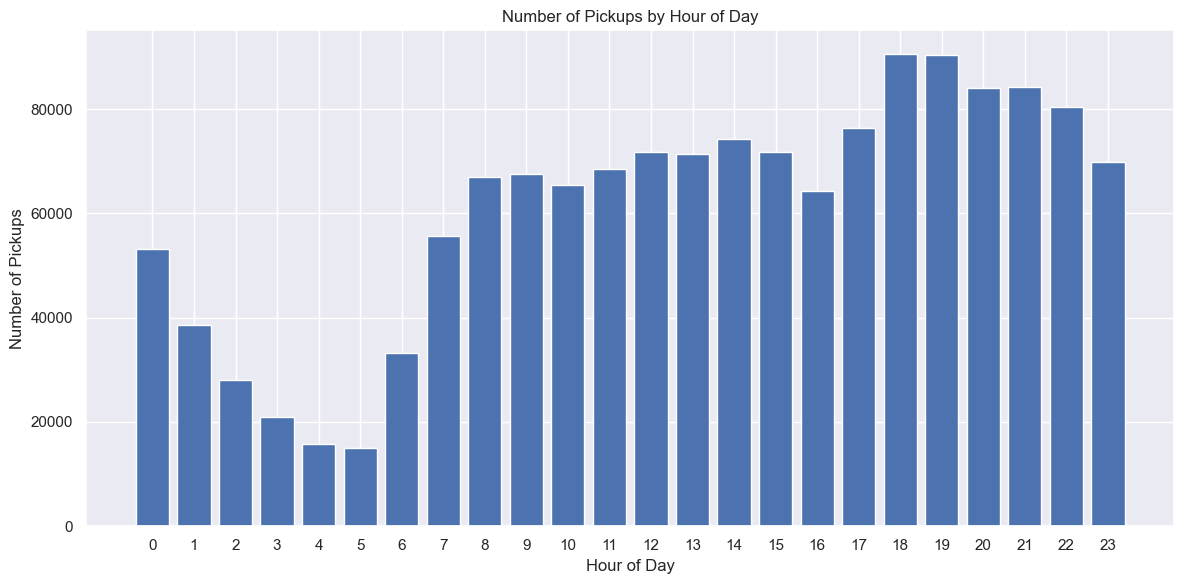

In [17]:
# 3. Number of pickups per hour
hourly_counts = df.groupby('pickup_hour').size()
plt.figure()
plt.bar(hourly_counts.index, hourly_counts.values)
plt.title('Number of Pickups by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pickups')
plt.xticks(range(0,24))
plt.tight_layout()
plt.show()




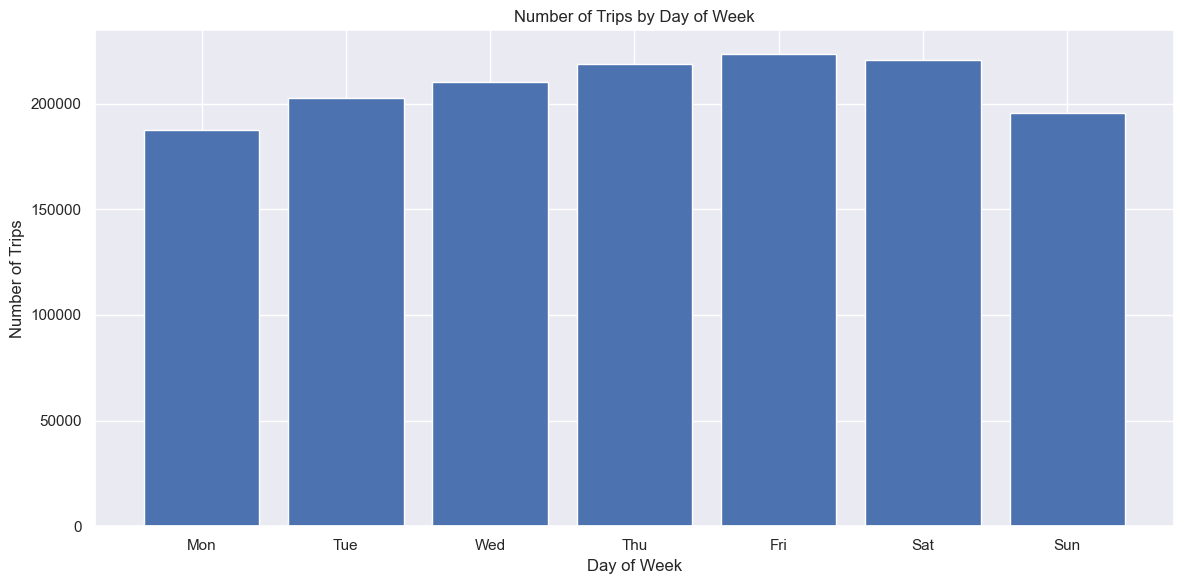

In [18]:
# 5. Trips by Day of Week
dow_counts = df.groupby('pickup_dow').size()
dow_counts.index = dow_counts.index.map(weekday_map)  # Map numbers to day names
plt.figure()
plt.bar(dow_counts.index, dow_counts.values)
plt.title('Number of Trips by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Trips')
plt.tight_layout()
plt.show()





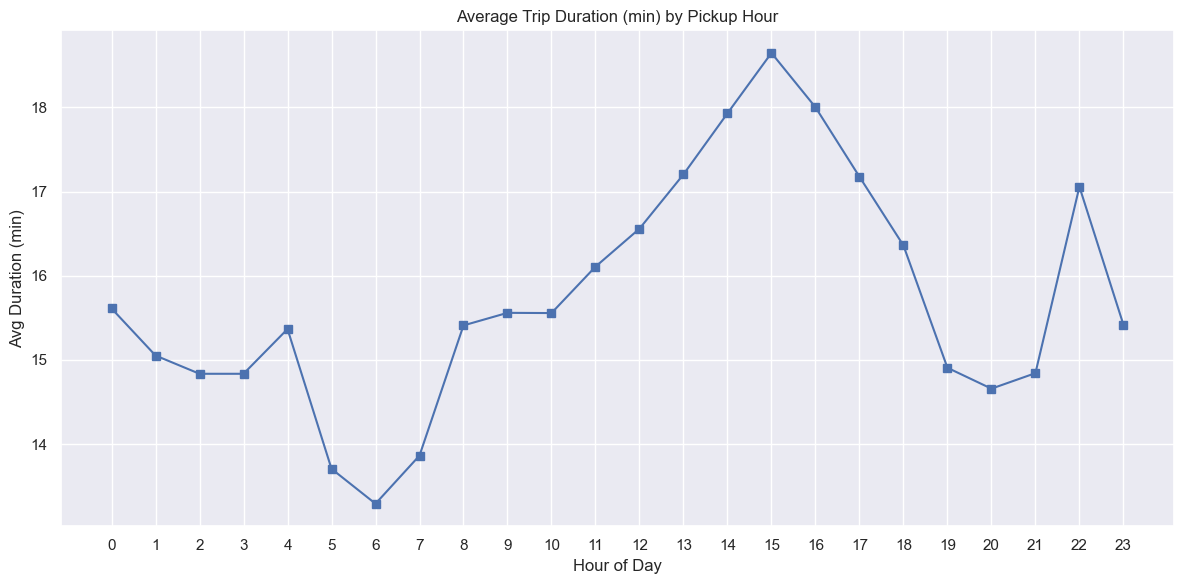

In [19]:
# 6. Average Trip Duration by Hour (to spot peak‑delay windows)
avg_dur = df.groupby('pickup_hour')['trip_duration_m'].mean()
plt.figure()
plt.plot(avg_dur.index, avg_dur.values, marker='s')
plt.title('Average Trip Duration (min) by Pickup Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Avg Duration (min)')
plt.xticks(range(0,24))
plt.tight_layout()
plt.show()



/var/folders/x8/hrhy3k6x6xnb1qwtw9fnvmvr0000gn/T/ipykernel_23003/2409052406.py:14: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.
  plt.tight_layout()
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


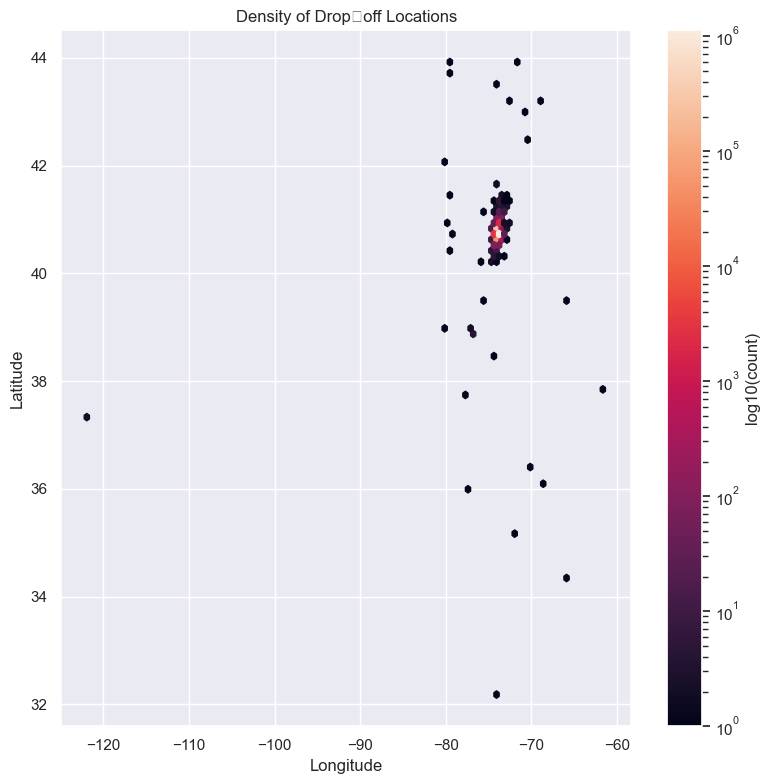

In [20]:
# 7. Popular Drop‑off Locations (hexbin heatmap)
plt.figure(figsize=(8,8))
plt.hexbin(
    df['dropoff_longitude'],
    df['dropoff_latitude'],
    gridsize=100,
    bins='log'
)
plt.title('Density of Drop‑off Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
cb = plt.colorbar()
cb.set_label('log10(count)')
plt.tight_layout()
plt.show()
